In [1]:
# pull in dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

import seaborn as sns

In [2]:
cleanData_df = pd.read_csv('Data/All Data/HappynessWithFreedom.csv', index_col=False)
#HappynessWithFreedom.csv

cleanData_df.head ()

,Unnamed: 0,Country,Happiness2015,GDP2015,Freedom2015,Generosity2015,Year2015,Corruption2015,Happiness2016,GDP2016,...,Freedom2020,Generosity2020,Year2020,Corruption2020,Happiness2021,GDP2021,Freedom2021,Generosity2021,Year2021,Corruption2021
0,0,Switzerland,7.587,1.39651,0.66557,0.29678,2015.0,0.41978,7.509,1.52733,...,0.921337,0.269056,2020.0,0.303728,7.571,1.566,0.919,0.204,2021.0,0.292
1,1,Iceland,7.561,1.30232,0.62877,0.43630,2015.0,0.14145,7.501,1.42666,...,0.948892,0.362330,2020.0,0.711710,7.554,1.482,0.955,0.293,2021.0,0.673
2,2,Denmark,7.527,1.32548,0.64938,0.34139,2015.0,0.48357,7.526,1.44178,...,0.951444,0.242793,2020.0,0.168489,7.620,1.502,0.946,0.208,2021.0,0.179
3,3,Norway,7.522,1.45900,0.66973,0.34699,2015.0,0.36503,7.498,1.57744,...,0.955750,0.287985,2020.0,0.263218,7.392,1.543,0.960,0.249,2021.0,0.270
4,4,Canada,7.427,1.32629,0.63297,0.45811,2015.0,0.32957,7.404,1.44015,...,0.933913,0.281529,2020.0,0.390843,7.103,1.447,0.915,0.246,2021.0,0.415


In [8]:
cleanData_df.dropna(inplace=True) 

In [9]:
Freedom_analysis_df = cleanData_df[['Country', 'Happiness2015', 'Freedom2015', 'Year2015', 
                    'Happiness2016', 'Freedom2016', 'Year2016',
                    'Happiness2017', 'Freedom2017', 'Year2017',
                    'Happiness2018', 'Freedom2018', 'Year2018',
                    'Happiness2019', 'Freedom2019', 'Year2019',
                    'Happiness2020', 'Freedom2020', 'Year2020',              
                    'Happiness2021', 'Freedom2021', 'Year2021']].copy()
Freedom_analysis_df.head ()


,Country,Happiness2015,Freedom2015,Year2015,Happiness2016,Freedom2016,Year2016,Happiness2017,Freedom2017,Year2017,...,Year2018,Happiness2019,Freedom2019,Year2019,Happiness2020,Freedom2020,Year2020,Happiness2021,Freedom2021,Year2021
0,Switzerland,7.587,0.66557,2015.0,7.509,0.58557,2016.0,7.494,0.620071,2017.0,...,2018.0,7.480,0.572,2019.0,7.5599,0.921337,2020.0,7.571,0.919,2021.0
1,Iceland,7.561,0.62877,2015.0,7.501,0.56624,2016.0,7.504,0.627163,2017.0,...,2018.0,7.494,0.591,2019.0,7.5045,0.948892,2020.0,7.554,0.955,2021.0
2,Denmark,7.527,0.64938,2015.0,7.526,0.57941,2016.0,7.522,0.626007,2017.0,...,2018.0,7.600,0.592,2019.0,7.6456,0.951444,2020.0,7.620,0.946,2021.0
3,Norway,7.522,0.66973,2015.0,7.498,0.59609,2016.0,7.537,0.635423,2017.0,...,2018.0,7.554,0.603,2019.0,7.4880,0.955750,2020.0,7.392,0.960,2021.0
4,Canada,7.427,0.63297,2015.0,7.404,0.57370,2016.0,7.316,0.611101,2017.0,...,2018.0,7.278,0.584,2019.0,7.2321,0.933913,2020.0,7.103,0.915,2021.0


In [10]:
happy_year_df = Freedom_analysis_df[['Country','Happiness2015','Happiness2016','Happiness2017',
                      'Happiness2018','Happiness2019','Happiness2020','Happiness2021']]
happyavg = happy_year_df.mean(axis = 1)
happy_year_df


,Country,Happiness2015,Happiness2016,Happiness2017,Happiness2018,Happiness2019,Happiness2020,Happiness2021
0,Switzerland,7.587,7.509,7.494,7.487,7.480,7.5599,7.571
1,Iceland,7.561,7.501,7.504,7.495,7.494,7.5045,7.554
2,Denmark,7.527,7.526,7.522,7.555,7.600,7.6456,7.620
3,Norway,7.522,7.498,7.537,7.594,7.554,7.4880,7.392
4,Canada,7.427,7.404,7.316,7.328,7.278,7.2321,7.103
...,...,...,...,...,...,...,...,...
152,Afghanistan,3.575,3.360,3.794,3.632,3.203,2.5669,2.523
153,Rwanda,3.465,3.515,3.471,3.408,3.334,3.3123,3.415
154,Benin,3.340,3.484,3.657,4.141,4.883,5.2160,5.045
156,Burundi,2.905,2.905,2.905,2.905,3.775,3.7753,3.775


In [11]:
Freedom_df = Freedom_analysis_df[['Country','Freedom2015', 'Freedom2016', 'Freedom2017',
                           'Freedom2018', 'Freedom2019', 'Freedom2020', 'Freedom2021' ]]


In [12]:
freedom_avg = Freedom_df.mean(axis = 1)
freedom_avg

0      0.706221
1      0.713438
2      0.718177
3      0.729428
4      0.700526
         ...   
152    0.195456
153    0.672235
154    0.512731
156    0.251279
157    0.441081
Length: 136, dtype: float64

In [13]:
happy_freedom_df = Freedom_analysis_df[['Happiness2015','Happiness2016','Happiness2017',
                      'Happiness2018','Happiness2019','Happiness2020','Happiness2021','Country','Freedom2015', 'Freedom2016', 'Freedom2017',
                           'Freedom2018', 'Freedom2019', 'Freedom2020', 'Freedom2021']]
happy_freedom_df

,Happiness2015,Happiness2016,Happiness2017,Happiness2018,Happiness2019,Happiness2020,Happiness2021,Country,Freedom2015,Freedom2016,Freedom2017,Freedom2018,Freedom2019,Freedom2020,Freedom2021
0,7.587,7.509,7.494,7.487,7.480,7.5599,7.571,Switzerland,0.66557,0.58557,0.620071,0.660,0.572,0.921337,0.919
1,7.561,7.501,7.504,7.495,7.494,7.5045,7.554,Iceland,0.62877,0.56624,0.627163,0.677,0.591,0.948892,0.955
2,7.527,7.526,7.522,7.555,7.600,7.6456,7.620,Denmark,0.64938,0.57941,0.626007,0.683,0.592,0.951444,0.946
3,7.522,7.498,7.537,7.594,7.554,7.4880,7.392,Norway,0.66973,0.59609,0.635423,0.686,0.603,0.955750,0.960
4,7.427,7.404,7.316,7.328,7.278,7.2321,7.103,Canada,0.63297,0.57370,0.611101,0.653,0.584,0.933913,0.915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.575,3.360,3.794,3.632,3.203,2.5669,2.523,Afghanistan,0.23414,0.16430,0.106180,0.085,0.000,0.396573,0.382
153,3.465,3.515,3.471,3.408,3.334,3.3123,3.415,Rwanda,0.59201,0.54320,0.581844,0.636,0.555,0.900589,0.897
154,3.340,3.484,3.657,4.141,4.883,5.2160,5.045,Benin,0.48450,0.39747,0.425963,0.440,0.349,0.735183,0.757
156,2.905,2.905,2.905,2.905,3.775,3.7753,3.775,Burundi,0.11850,0.04320,0.059901,0.065,0.220,0.626350,0.626


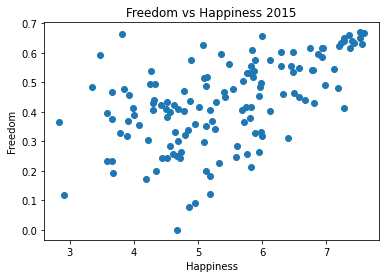

In [17]:
x_axis = happy_year_df['Happiness2015']
y_axis = Freedom_df['Freedom2015']

#freedom of people affects their happiness
#Set plot points and plot the scatter
plt.xlabel('Happiness')
plt.ylabel('Freedom')
plt.title('Freedom vs Happiness 2015')
plt.scatter(x_axis,y_axis)

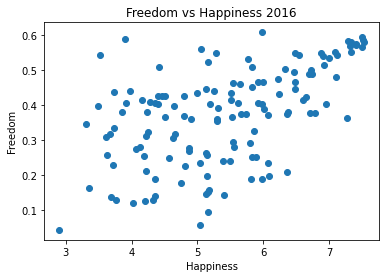

In [18]:
x_axis = happy_year_df['Happiness2016']
y_axis = Freedom_df['Freedom2016']

#freedom of people affects their happiness
#Set plot points and plot the scatter
plt.xlabel('Happiness')
plt.ylabel('Freedom')
plt.title('Freedom vs Happiness 2016')
plt.scatter(x_axis,y_axis)

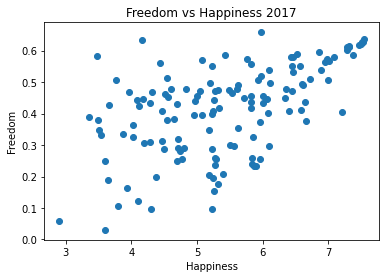

In [19]:
x_axis = happy_year_df['Happiness2017']
y_axis = Freedom_df['Freedom2017']

#freedom of people affects their happiness
#Set plot points and plot the scatter
plt.xlabel('Happiness')
plt.ylabel('Freedom')
plt.title('Freedom vs Happiness 2017')
plt.scatter(x_axis,y_axis)

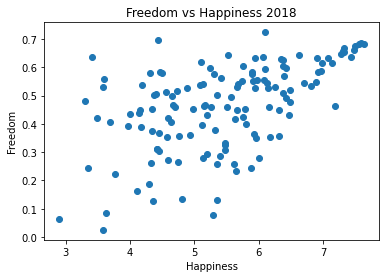

In [20]:
x_axis = happy_year_df['Happiness2018']
y_axis = Freedom_df['Freedom2018']

#freedom of people affects their happiness
#Set plot points and plot the scatter
plt.xlabel('Happiness')
plt.ylabel('Freedom')
plt.title('Freedom vs Happiness 2018')
plt.scatter(x_axis,y_axis)

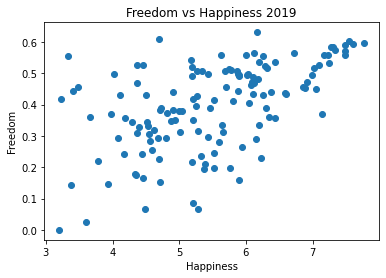

In [21]:
x_axis = happy_year_df['Happiness2019']
y_axis = Freedom_df['Freedom2019']

#freedom of people affects their happiness
#Set plot points and plot the scatter
plt.xlabel('Happiness')
plt.ylabel('Freedom')
plt.title('Freedom vs Happiness 2019')
plt.scatter(x_axis,y_axis)

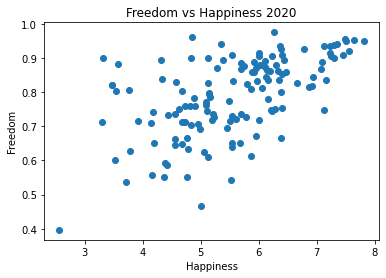

In [22]:
x_axis = happy_year_df['Happiness2020']
y_axis = Freedom_df['Freedom2020']

#freedom of people affects their happiness
#Set plot points and plot the scatter
plt.xlabel('Happiness')
plt.ylabel('Freedom')
plt.title('Freedom vs Happiness 2020')
plt.scatter(x_axis,y_axis)

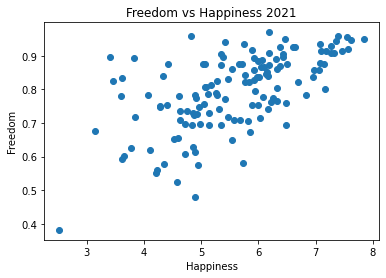

In [23]:
x_axis = happy_year_df['Happiness2021']
y_axis = Freedom_df['Freedom2021']

#freedom of people affects their happiness
#Set plot points and plot the scatter
plt.xlabel('Happiness')
plt.ylabel('Freedom')
plt.title('Freedom vs Happiness 2021')
plt.scatter(x_axis,y_axis)